#                                     LIFE EXPECTANCY DATA ANALYSIS PROJECT

###                                                Prepared By : Pulkit Mehrotra

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, r2_score

In [9]:
df = pd.read_excel(r"C:\Users\User\Downloads\Life Expectancy Data.xlsx")

# Exploratory Data Analysis (EDA)

In [13]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [15]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [19]:
print(df.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


## Visually Checking for Missing Values

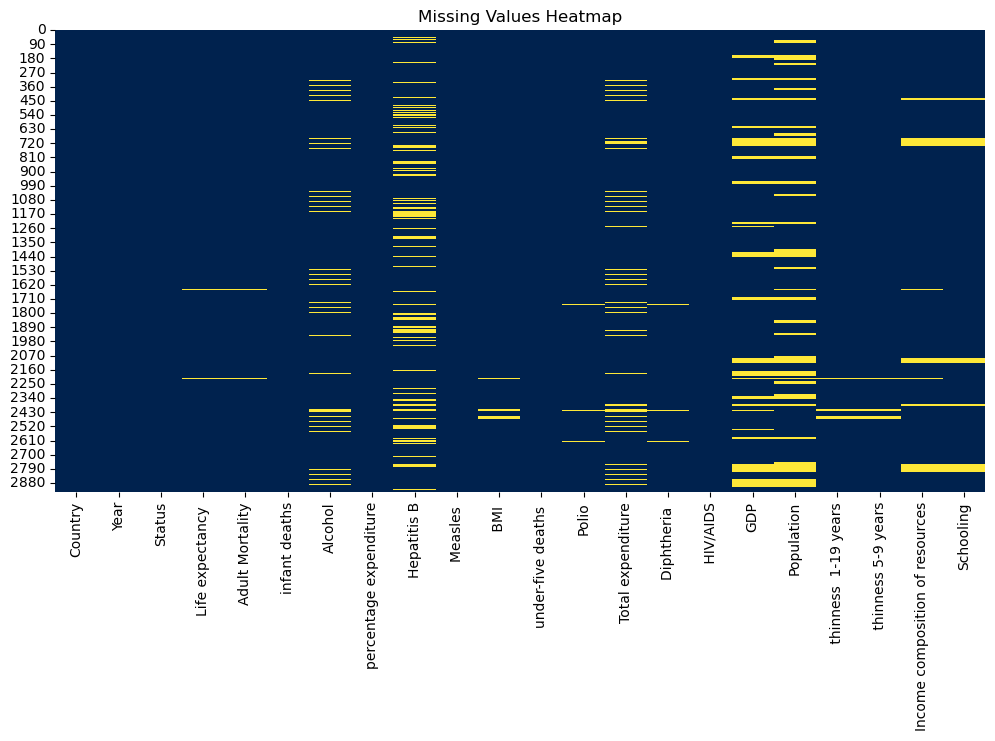

In [26]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='cividis')
plt.title("Missing Values Heatmap")
plt.show()

## Filling Missing Values

In [29]:
# For numeric columns
for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].median())

In [31]:
# for categorical columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

## Visually RE-Checking for Missing Values

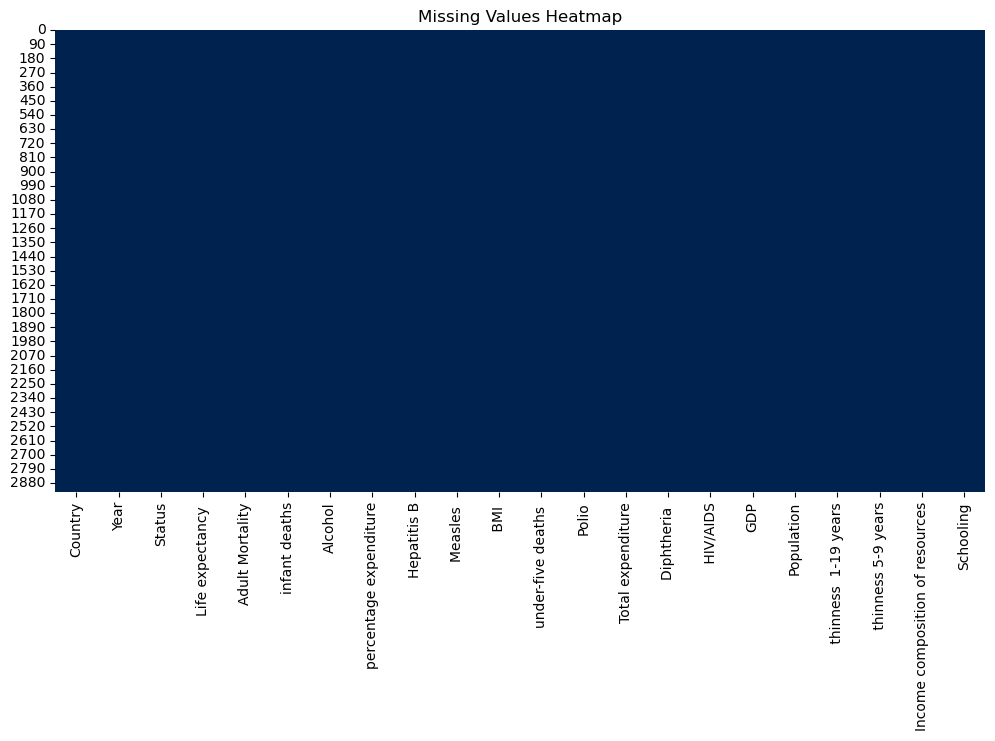

In [34]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='cividis')
plt.title("Missing Values Heatmap")
plt.show()

### From the above visual heatmap, It's now confirmed that there are no missing values in our data.

### > Target variable in our Dataset : Life Expectancy
### > Features/Factors in our Dataset :
###   (ii) Economic factors (GDP, Income)
###   (iii) Social factors (Education, Population)

## Frequency Distribution of Life Expectancy (Target variable)

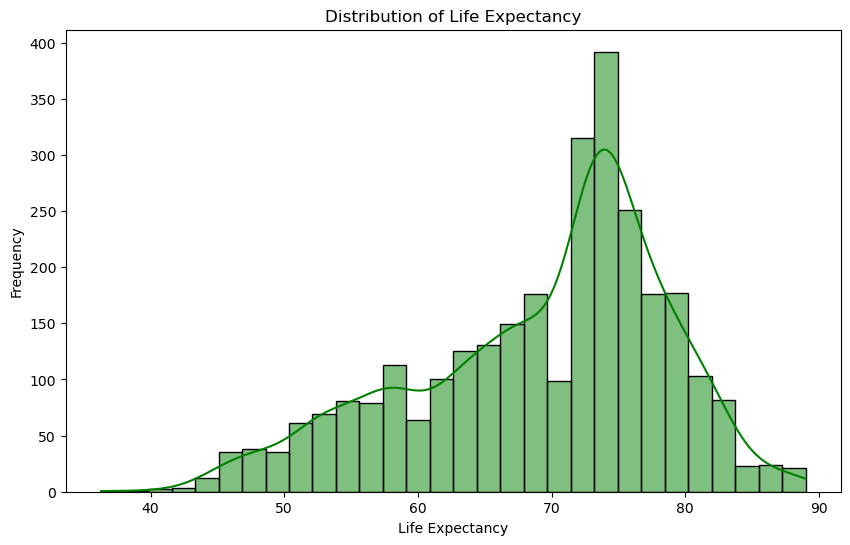

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Life expectancy "], bins=30, kde=True, color='green')
plt.title("Distribution of Life Expectancy")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.show()

## Visual Correlation between Life Expectancy & other features

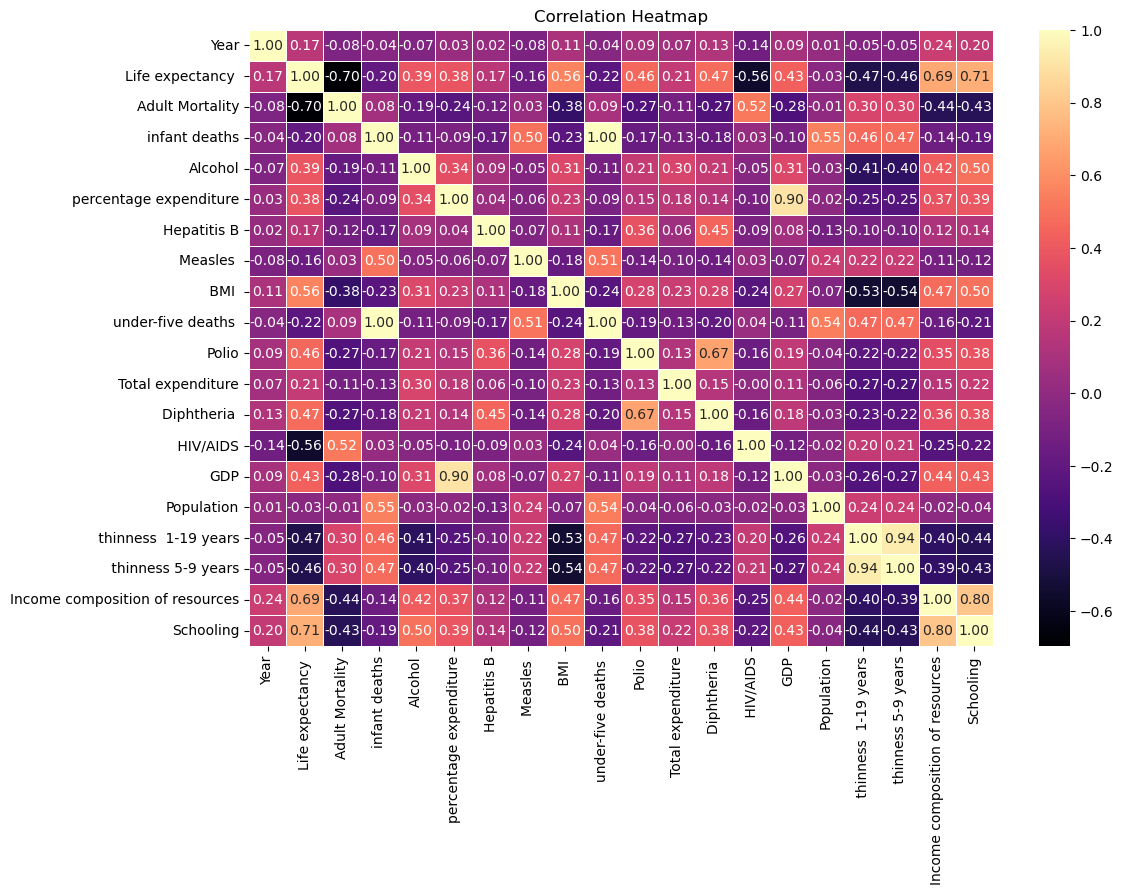

In [60]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), cmap='magma', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Key Insights from the above Correlation Heatmap

### (I) Life Expectancy has Strong Positive Correlation with:
#### 1) Schooling (0.71) - More education with longer life expectancy.

#### 2) Income composition of resources (0.69) - Higher income and resource access increase life expectancy.

#### 3) Diphtheria (0.67) and GDP (0.43) - Better vaccination coverage and stronger economies promote longer life spans.

### (II) Life Expectancy has Strong Negative Correlation with:

#### 1) Adult Mortality (-0.70) and Infant deaths (-0.44) - Higher mortality rates reduce life expectancy.

#### 2) Under-five deaths (-0.44) - More child deaths = lower life expectancy.

### (III) Adult Mortality, Infant deaths, and Under-five deaths are highly positively correlated (~0.9).
#### This Suggests that these indicators move together — if one is high, others tend to be high too.

### (IV) Education and Income: 

#### 1) Schooling - Income composition of resources (0.64) : Countries with better education levels tend to have higher income equality and resource access.

#### 2) Schooling - GDP (0.43) : Education correlates moderately with national income, reflecting economic development.

## Pairplot for top correlated features

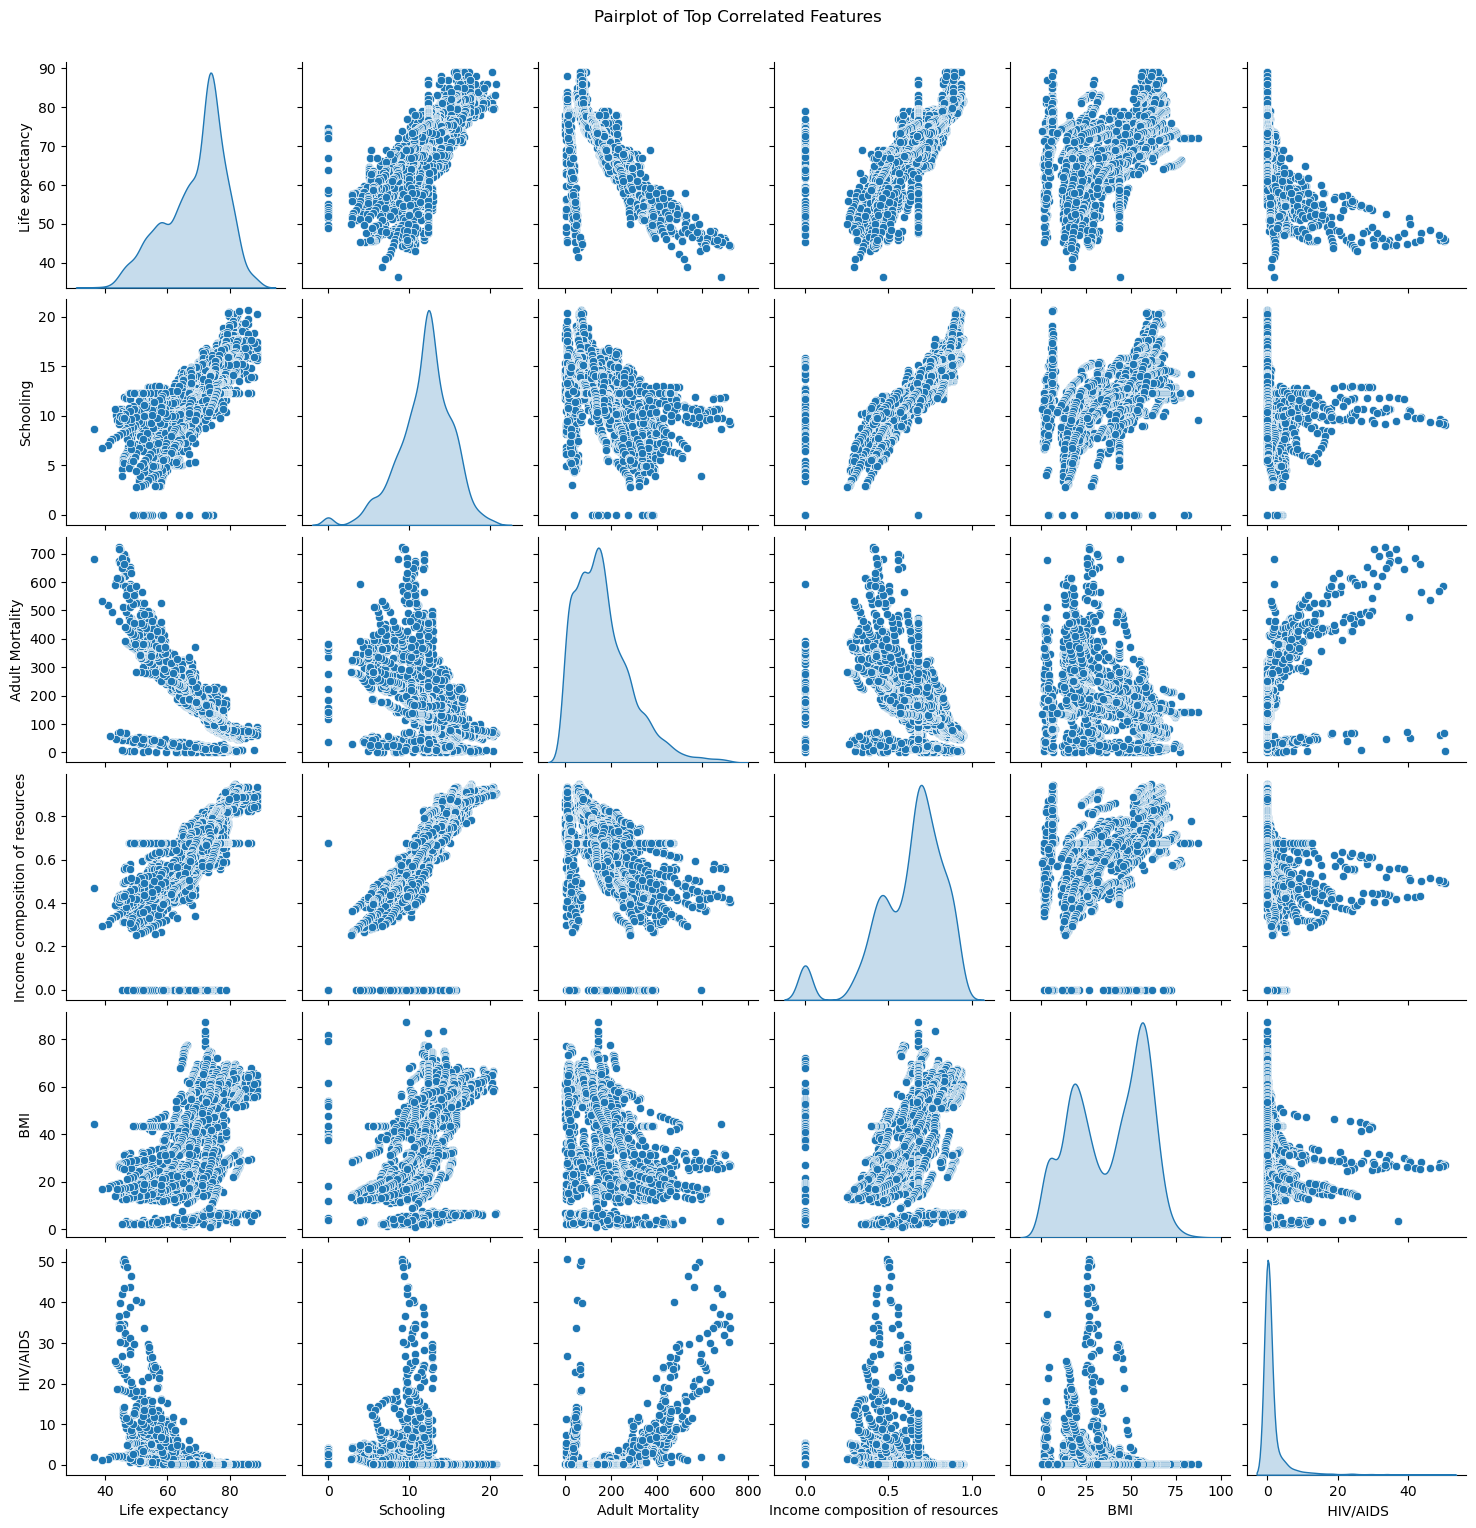

In [70]:
top_corr = df.corr(numeric_only=True)["Life expectancy "].abs().sort_values(ascending=False).head(6).index
sns.pairplot(df[top_corr], diag_kind='kde')
plt.suptitle("Pairplot of Top Correlated Features", y=1.02)
plt.show()

# Feature Engineering

## Encoding Categorical Data

In [116]:
df = pd.get_dummies(df,columns=['Status'],drop_first = True)

## Normalizing/Scaling Numerical Features

In [120]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = df.select_dtypes(include=np.number).columns

In [122]:
df[cols] = scaler.fit_transform(df[cols])

In [124]:
df

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
0,Afghanistan,1.621762,-0.445408,0.792119,0.268824,-1.156989,-0.335570,-0.783807,-0.110384,-0.967349,...,0.931485,-0.735391,-0.323445,-0.453371,0.435183,2.815209,2.775386,-0.737973,-0.585017,True
1,Afghanistan,1.404986,-0.981827,0.856601,0.285786,-1.156989,-0.334441,-0.914281,-0.168124,-0.992434,...,0.939818,-0.862233,-0.323445,-0.451232,-0.183349,2.883439,2.819978,-0.752600,-0.615649,True
2,Afghanistan,1.188210,-0.981827,0.832421,0.302749,-1.156989,-0.334594,-0.827298,-0.173531,-1.017519,...,0.918987,-0.777671,-0.323445,-0.449799,0.398066,2.928926,2.864570,-0.781853,-0.646281,True
3,Afghanistan,0.971434,-1.023899,0.864662,0.328193,-1.156989,-0.332096,-0.696824,0.032045,-1.042605,...,1.081463,-0.650830,-0.323445,-0.446924,-0.120968,2.974413,2.931458,-0.815982,-0.676912,True
4,Afghanistan,0.754658,-1.055453,0.888843,0.345155,-1.156989,-0.367862,-0.653333,0.051757,-1.062673,...,0.810670,-0.608549,-0.323445,-0.492539,-0.134268,3.042643,2.976051,-0.859862,-0.768808,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,-0.762774,-2.622638,4.499850,-0.028022,-0.047657,-0.371433,-0.653333,-0.208332,-0.565984,...,0.502383,-0.735391,6.275044,-0.463141,0.047149,1.041221,1.013994,-1.089014,-0.860703,True
2934,Zimbabwe,-0.979550,-2.601602,4.435368,-0.036503,-0.124162,-0.371433,-3.306306,-0.123991,-0.586052,...,0.248255,-0.608549,6.885650,-0.463218,0.044490,1.132194,1.125475,-1.035383,-0.768808,True
2935,Zimbabwe,-1.196326,-2.570047,-0.739335,-0.044984,-0.029805,-0.371433,-0.435876,-0.184521,-0.606120,...,0.252421,-0.481708,7.496256,-0.493005,-0.187090,-0.823741,-0.791989,-0.991502,-0.615649,True
2936,Zimbabwe,-1.413102,-2.517457,4.201620,-0.044984,-0.720907,-0.371433,-0.305402,-0.164897,-0.626188,...,0.098278,-0.312585,7.949287,-0.456054,0.039533,-0.732768,-0.702805,-0.991502,-0.676912,True


# Feature Selection

In [127]:
X = df.drop("Life expectancy ", axis=1)
y = df["Life expectancy "]

## Splitting Data

In [130]:
from sklearn.model_selection import train_test_split,GridSearchCV

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [132]:
X_train.shape

(2350, 21)

In [134]:
X_test.shape

(588, 21)

# Model Selection & Training

## TRAIN AN XG-BOOST REGRESSION MODEL

In [138]:
X_train['Country'] = X_train['Country'].astype('category')
X_test['Country'] = X_test['Country'].astype('category')

In [140]:
import xgboost as xgb

model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, enable_categorical=True)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [142]:
# make predictions on the test data
y_pred = model.predict(X_test)
y_pred

array([-0.21694164, -0.46289766,  0.19049296,  0.8125026 ,  1.0607191 ,
       -1.9692668 ,  0.0747771 , -1.2317473 ,  0.851321  ,  1.494584  ,
       -1.4696757 ,  1.0853907 , -0.8107634 ,  0.417814  ,  0.3188029 ,
        0.1338552 , -1.9222803 ,  1.5021622 , -1.7775083 , -0.9525919 ,
       -0.44747958,  0.6799218 ,  0.43334654, -1.4856057 ,  0.08259401,
       -1.6131096 ,  0.3926588 , -0.3436274 , -0.4842702 ,  0.5920796 ,
       -1.774052  ,  1.0652584 ,  0.6459168 , -1.3990239 ,  0.4523925 ,
        0.04072738, -0.08705305, -0.65999544,  1.1527308 ,  1.070936  ,
       -0.21495782,  0.2500136 ,  0.2969435 ,  1.1466211 ,  0.39170974,
        1.4252431 , -0.29180866,  0.3652692 ,  0.40689728,  0.46636066,
        0.51692903,  0.18144153, -0.50283414, -0.3902004 , -0.4294414 ,
       -0.6222245 ,  0.46495396,  0.38143182,  1.2962879 ,  0.43143812,
       -1.1831292 , -0.0844864 ,  0.49574807, -1.0387309 , -1.1956501 ,
       -1.3264427 , -1.9327643 , -0.4094013 ,  0.37295067,  0.32

# Model-Evaluation

In [145]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("XGBoost R2 Score:", r2_score(y_test, y_pred))
print("XGBoost MAE:", mean_absolute_error(y_test, y_pred))
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

XGBoost R2 Score: -0.43148285698030864
XGBoost MAE: 0.8590178734364345
XGBoost RMSE: 1.171533455446369


# Hyperparameter Tuning

### The key hyperparameters tuned are:
### 1) n_estimators: Number of boosting rounds
### 2) max_depth: Maximum depth of the trees
### 3) learning_rate: Step size shrinkage used in updates
### The best model is selected based on the highest R-squared score.

In [149]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
gs = GridSearchCV(model, param_grid, cv=5, scoring='r2')
gs.fit(X_train, y_train)
print("Best Parameters:", gs.best_params_)
y_pred_gs = gs.best_estimator_.predict(X_test)

print("Tuned XGBoost R2 Score:", r2_score(y_test, y_pred_gs))
print("Tuned XGBoost MAE:", mean_absolute_error(y_test, y_pred_gs))
print("Tuned XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gs)))


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Tuned XGBoost R2 Score: -0.4956105452769459
Tuned XGBoost MAE: 0.8743982280488678
Tuned XGBoost RMSE: 1.1974871970719387


# Conclusion

### In this step, the model's performance is evaluated by comparing the XGBoost model with hyperparameter tuning against the baseline XGBoost model.
### The comparison is based on the R-squared score (R²), which measures how well the model predicts the target variable.

In [152]:
if r2_score(y_test, y_pred_gs) > r2_score(y_test, y_pred):
    print("XGBoost with Hyperparameter Tuning is the best model.")
else:
    print("XGBoost without tuning is the best model.")

XGBoost without tuning is the best model.


# Top contributing features

<Figure size 1200x800 with 0 Axes>

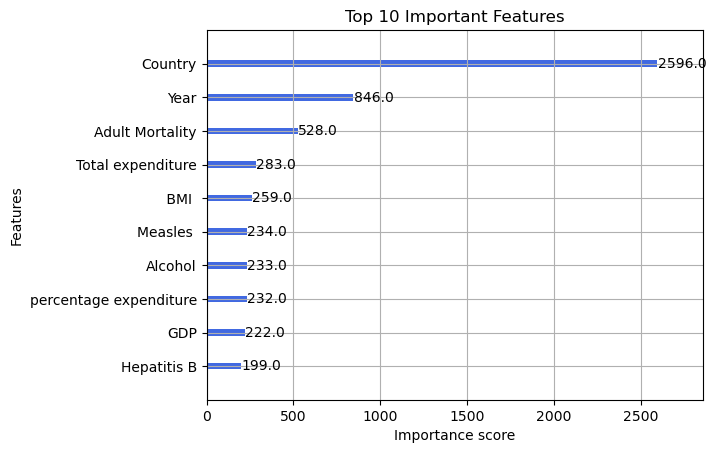

In [155]:
plt.figure(figsize=(12, 8))
xgb.plot_importance(gs.best_estimator_, max_num_features=10, importance_type='weight', color='RoyalBlue')
plt.title("Top 10 Important Features")
plt.show()

# Save the Model

In [158]:
import pickle
with open("life_expectancy_model.pkl", "wb") as f:
    pickle.dump(gs.best_estimator_, f)

print("Model Saved Successfully")

Model Saved Successfully
